In [2]:
from nilearn import image, plotting
import nibabel as nib
from nilearn.masking import apply_mask, compute_epi_mask
import matplotlib.pyplot as plt


In [3]:
file1 = "data/ds000217_R1.0.1/sub-Exp1s01/anat/sub-Exp1s01_T1w.nii"
img = image.smooth_img(file1, fwhm="fast")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


([<matplotlib.lines.Line2D at 0x15fa74520>],
 <nilearn.plotting.displays._slicers.OrthoSlicer at 0x15fd99bd0>)

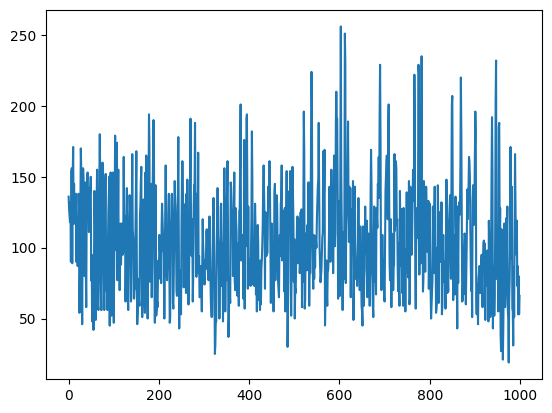

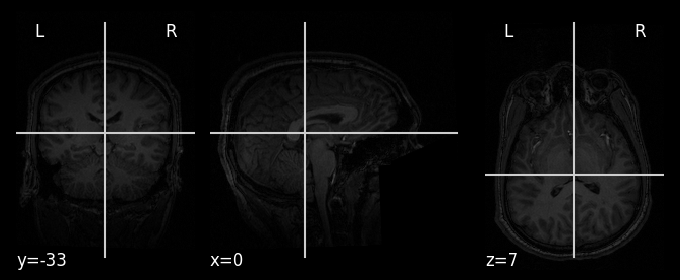

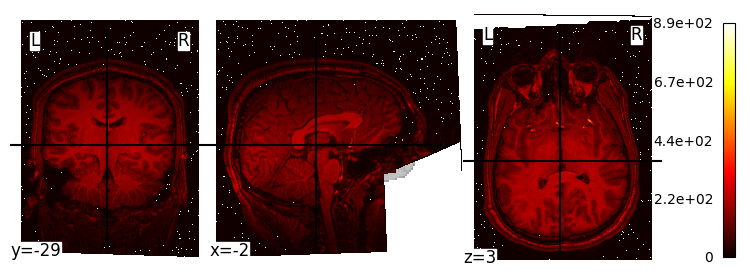

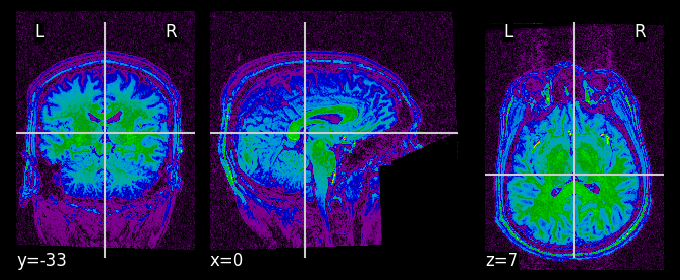

In [4]:

masked_img = compute_epi_mask(file1)
masked_data = apply_mask(file1, masked_img)

plt.plot(masked_data[:1000]), plotting.plot_anat(file1), plotting.plot_stat_map(file1), plotting.plot_epi(file1)

In [6]:
image = nib.load(file1)

In [7]:
h = image.header
image.shape, h

((256, 256, 176), <nibabel.nifti1.Nifti1Header at 0x16e72aaa0>)

In [8]:
data = image.get_fdata()
data_f = image.get_data_dtype()
data.shape, type(data)

((256, 256, 176), numpy.ndarray)